In [19]:
library(rpart)
library(rpart.plot)
library(corrplot)

Warning message:
"package 'corrplot' was built under R version 4.3.3"
corrplot 0.92 loaded



In [8]:

water.quality <- read.csv('C:/Users/ashis/Downloads/water_potability.csv')
head(water.quality)
summary(water.quality)
nrow(water.quality)
dim(water.quality)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,NA,204.8905,20791.32,7.300212,368.5164,564.3087,10.379783,86.99097,2.963135,0
2,3.716080,129.4229,18630.06,6.635246,NA,592.8854,15.180013,56.32908,4.500656,0
3,8.099124,224.2363,19909.54,9.275884,NA,418.6062,16.868637,66.42009,3.055934,0
4,8.316766,214.3734,22018.42,8.059332,356.8861,363.2665,18.436524,100.34167,4.628771,0
5,9.092223,181.1015,17978.99,6.546600,310.1357,398.4108,11.558279,31.99799,4.075075,0
6,5.584087,188.3133,28748.69,7.544869,326.6784,280.4679,8.399735,54.91786,2.559708,0


       ph            Hardness          Solids         Chloramines    
 Min.   : 0.000   Min.   : 47.43   Min.   :  320.9   Min.   : 0.352  
 1st Qu.: 6.093   1st Qu.:176.85   1st Qu.:15666.7   1st Qu.: 6.127  
 Median : 7.037   Median :196.97   Median :20927.8   Median : 7.130  
 Mean   : 7.081   Mean   :196.37   Mean   :22014.1   Mean   : 7.122  
 3rd Qu.: 8.062   3rd Qu.:216.67   3rd Qu.:27332.8   3rd Qu.: 8.115  
 Max.   :14.000   Max.   :323.12   Max.   :61227.2   Max.   :13.127  
 NA's   :491                                                         
    Sulfate       Conductivity   Organic_carbon  Trihalomethanes  
 Min.   :129.0   Min.   :181.5   Min.   : 2.20   Min.   :  0.738  
 1st Qu.:307.7   1st Qu.:365.7   1st Qu.:12.07   1st Qu.: 55.845  
 Median :333.1   Median :421.9   Median :14.22   Median : 66.622  
 Mean   :333.8   Mean   :426.2   Mean   :14.28   Mean   : 66.396  
 3rd Qu.:360.0   3rd Qu.:481.8   3rd Qu.:16.56   3rd Qu.: 77.337  
 Max.   :481.0   Max.   :753.3   Max. 

[1] 3276

[1] 3276   10

In [9]:
sum(apply(water.quality, 1, anyNA))
sum(is.na(water.quality$ph))
sum(is.na(water.quality$Hardness))
sum(is.na(water.quality$Solids))
sum(is.na(water.quality$Chloramines))
sum(is.na(water.quality$Sulfate))
sum(is.na(water.quality$Conductivity))
sum(is.na(water.quality$Organic_carbon))
sum(is.na(water.quality$Trihalomethanes))
sum(is.na(water.quality$Turbidity))
sum(is.na(water.quality$Potability))

[1] 1265

[1] 491

[1] 0

[1] 0

[1] 0

[1] 781

[1] 0

[1] 0

[1] 162

[1] 0

[1] 0

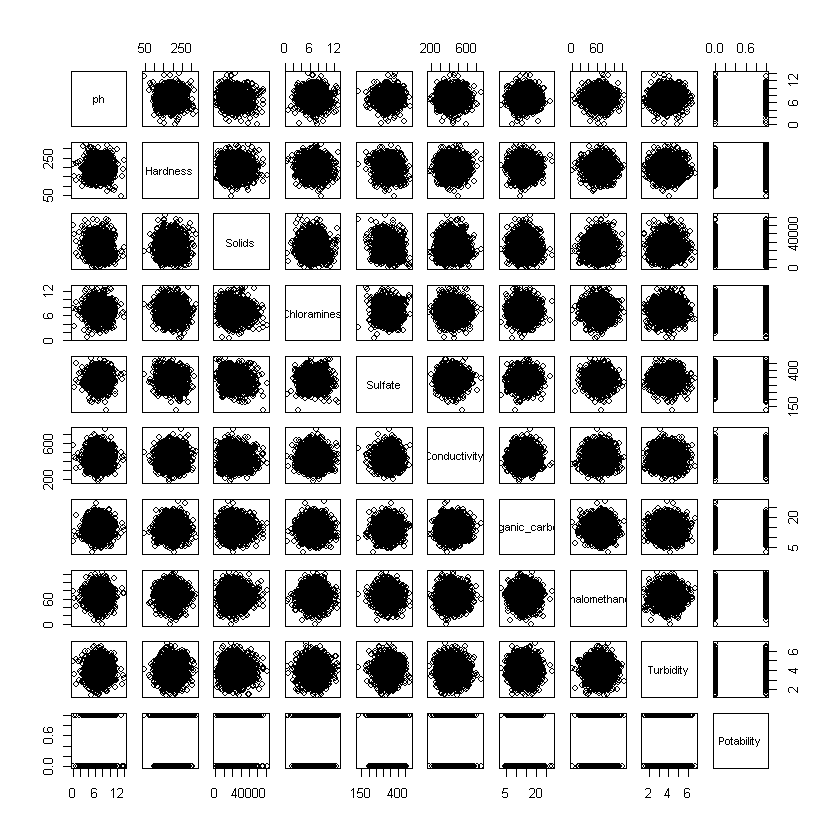

In [10]:
pairs(water.quality)


Since the pH, Sulfate and Trihalomethanes Columns have null values, we, for now, replace them with the median values. 

In [11]:
water.quality$ph[is.na(water.quality$ph)] <- median(water.quality$ph, na.rm = TRUE)
water.quality$Sulfate[is.na(water.quality$Sulfate)] <- median(water.quality$Sulfate, na.rm = TRUE)
water.quality$Trihalomethanes[is.na(water.quality$Trihalomethanes)] <- median(water.quality$Trihalomethanes, na.rm = TRUE)

In [12]:
nrow(water.quality)

[1] 3276

Looking at the pH values, for surface water systems, we can categorize the pH as follows

- pH values below 6.5 are considered to be acidic
- pH values between 6.5 to 8.5 are mapped to the normal pH category
- pH values above 8.5 are considered to be basic

[Source](https://www.knowyourh2o.com/indoor-4/the-ph-of-water)

In [13]:
water.quality$pH_category <- cut(water.quality$ph, 
                                 breaks = c(0, 6.5, 8.5, 14), 
                                 labels = c("acidic", "normal", "basic"))

In [14]:
head(water.quality)
dim(water.quality)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,pH_category
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
1,7.036752,204.8905,20791.32,7.300212,368.5164,564.3087,10.379783,86.99097,2.963135,0,normal
2,3.716080,129.4229,18630.06,6.635246,333.0735,592.8854,15.180013,56.32908,4.500656,0,acidic
3,8.099124,224.2363,19909.54,9.275884,333.0735,418.6062,16.868637,66.42009,3.055934,0,normal
4,8.316766,214.3734,22018.42,8.059332,356.8861,363.2665,18.436524,100.34167,4.628771,0,normal
5,9.092223,181.1015,17978.99,6.546600,310.1357,398.4108,11.558279,31.99799,4.075075,0,basic
6,5.584087,188.3133,28748.69,7.544869,326.6784,280.4679,8.399735,54.91786,2.559708,0,acidic


[1] 3276   11

# Exploratory Data Analysis

We will first be looking into the description of how our dataset is in terms of potable and not-potable water.

In [16]:
print("Non-Potable")
summary(subset(water.quality, Potability == 0))
print("Potable")
summary(subset(water.quality, Potability == 1))

[1] "Non-Potable"


       ph            Hardness          Solids         Chloramines    
 Min.   : 0.000   Min.   : 98.45   Min.   :  320.9   Min.   : 1.684  
 1st Qu.: 6.224   1st Qu.:177.82   1st Qu.:15663.1   1st Qu.: 6.156  
 Median : 7.037   Median :197.12   Median :20809.6   Median : 7.090  
 Mean   : 7.078   Mean   :196.73   Mean   :21777.5   Mean   : 7.092  
 3rd Qu.: 7.941   3rd Qu.:216.12   3rd Qu.:27006.2   3rd Qu.: 8.066  
 Max.   :14.000   Max.   :304.24   Max.   :61227.2   Max.   :12.653  
    Sulfate       Conductivity   Organic_carbon   Trihalomethanes  
 Min.   :203.4   Min.   :181.5   Min.   : 4.372   Min.   :  0.738  
 1st Qu.:319.4   1st Qu.:368.5   1st Qu.:12.101   1st Qu.: 56.442  
 Median :333.1   Median :422.2   Median :14.294   Median : 66.622  
 Mean   :334.2   Mean   :426.7   Mean   :14.364   Mean   : 66.321  
 3rd Qu.:348.3   3rd Qu.:480.7   3rd Qu.:16.649   3rd Qu.: 76.519  
 Max.   :460.1   Max.   :753.3   Max.   :28.300   Max.   :120.030  
   Turbidity       Potability pH_c

[1] "Potable"


       ph             Hardness          Solids         Chloramines    
 Min.   : 0.2275   Min.   : 47.43   Min.   :  728.8   Min.   : 0.352  
 1st Qu.: 6.3518   1st Qu.:174.33   1st Qu.:15669.0   1st Qu.: 6.094  
 Median : 7.0368   Median :196.63   Median :21199.4   Median : 7.215  
 Mean   : 7.0687   Mean   :195.80   Mean   :22384.0   Mean   : 7.169  
 3rd Qu.: 7.7801   3rd Qu.:218.00   3rd Qu.:27973.2   3rd Qu.: 8.199  
 Max.   :13.1754   Max.   :323.12   Max.   :56488.7   Max.   :13.127  
    Sulfate       Conductivity   Organic_carbon  Trihalomethanes  
 Min.   :129.0   Min.   :201.6   Min.   : 2.20   Min.   :  8.176  
 1st Qu.:313.1   1st Qu.:360.9   1st Qu.:12.03   1st Qu.: 56.911  
 Median :333.1   Median :420.7   Median :14.16   Median : 66.622  
 Mean   :332.7   Mean   :425.4   Mean   :14.16   Mean   : 66.543  
 3rd Qu.:354.8   3rd Qu.:484.2   3rd Qu.:16.36   3rd Qu.: 77.067  
 Max.   :481.0   Max.   :695.4   Max.   :23.60   Max.   :124.000  
   Turbidity       Potability pH_c

We will then look at all of the rows based on the pH category of the water

In [17]:
print("Acidic")
summary(subset(water.quality, pH_category == "acidic"))
print("Normal")
summary(subset(water.quality, pH_category == "normal"))
print("Basic")
summary(subset(water.quality, pH_category == "basic"))

[1] "Acidic"


       ph            Hardness          Solids         Chloramines     
 Min.   :0.2275   Min.   : 97.28   Min.   :  728.8   Min.   : 0.5304  
 1st Qu.:4.9925   1st Qu.:169.74   1st Qu.:16100.1   1st Qu.: 6.2201  
 Median :5.6664   Median :190.32   Median :21532.5   Median : 7.2587  
 Mean   :5.4409   Mean   :192.31   Mean   :22640.4   Mean   : 7.2472  
 3rd Qu.:6.1378   3rd Qu.:213.11   3rd Qu.:27818.2   3rd Qu.: 8.2738  
 Max.   :6.4991   Max.   :323.12   Max.   :56867.9   Max.   :13.0438  
    Sulfate       Conductivity   Organic_carbon  Trihalomethanes  
 Min.   :180.2   Min.   :217.4   Min.   : 2.20   Min.   :  8.577  
 1st Qu.:316.1   1st Qu.:364.4   1st Qu.:11.91   1st Qu.: 56.813  
 Median :333.1   Median :423.6   Median :14.03   Median : 66.622  
 Mean   :333.3   Mean   :425.7   Mean   :14.18   Mean   : 66.416  
 3rd Qu.:348.1   3rd Qu.:482.5   3rd Qu.:16.43   3rd Qu.: 76.464  
 Max.   :481.0   Max.   :708.2   Max.   :27.01   Max.   :120.030  
   Turbidity       Potability     

[1] "Normal"


       ph           Hardness          Solids         Chloramines    
 Min.   :6.504   Min.   : 98.37   Min.   :  320.9   Min.   : 0.352  
 1st Qu.:7.037   1st Qu.:179.80   1st Qu.:15899.7   1st Qu.: 6.124  
 Median :7.037   Median :198.54   Median :20922.2   Median : 7.116  
 Mean   :7.308   Mean   :197.82   Mean   :21936.5   Mean   : 7.098  
 3rd Qu.:7.698   3rd Qu.:216.43   3rd Qu.:27145.9   3rd Qu.: 8.065  
 Max.   :8.491   Max.   :306.63   Max.   :61227.2   Max.   :12.580  
    Sulfate       Conductivity   Organic_carbon   Trihalomethanes  
 Min.   :187.2   Min.   :181.5   Min.   : 4.372   Min.   :  0.738  
 1st Qu.:317.0   1st Qu.:365.1   1st Qu.:12.066   1st Qu.: 56.723  
 Median :333.1   Median :421.1   Median :14.281   Median : 66.622  
 Mean   :333.3   Mean   :425.7   Mean   :14.301   Mean   : 66.467  
 3rd Qu.:350.6   3rd Qu.:480.2   3rd Qu.:16.571   3rd Qu.: 77.135  
 Max.   :476.5   Max.   :666.7   Max.   :28.300   Max.   :124.000  
   Turbidity       Potability     pH_cate

[1] "Basic"


       ph            Hardness          Solids       Chloramines    
 Min.   : 8.502   Min.   : 47.43   Min.   : 2553   Min.   : 2.103  
 1st Qu.: 8.828   1st Qu.:174.94   1st Qu.:14054   1st Qu.: 6.011  
 Median : 9.239   Median :200.74   Median :19678   Median : 6.963  
 Mean   : 9.449   Mean   :198.98   Mean   :21008   Mean   : 6.964  
 3rd Qu.: 9.879   3rd Qu.:222.97   3rd Qu.:26945   3rd Qu.: 7.944  
 Max.   :14.000   Max.   :317.34   Max.   :56489   Max.   :13.127  
    Sulfate       Conductivity   Organic_carbon   Trihalomethanes 
 Min.   :129.0   Min.   :258.9   Min.   : 5.188   Min.   : 18.10  
 1st Qu.:320.3   1st Qu.:371.5   1st Qu.:12.381   1st Qu.: 55.92  
 Median :333.1   Median :423.1   Median :14.359   Median : 66.62  
 Mean   :335.5   Mean   :429.0   Mean   :14.449   Mean   : 66.15  
 3rd Qu.:352.7   3rd Qu.:485.4   3rd Qu.:16.670   3rd Qu.: 75.86  
 Max.   :460.1   Max.   :753.3   Max.   :23.918   Max.   :114.21  
   Turbidity       Potability     pH_category 
 Min.   

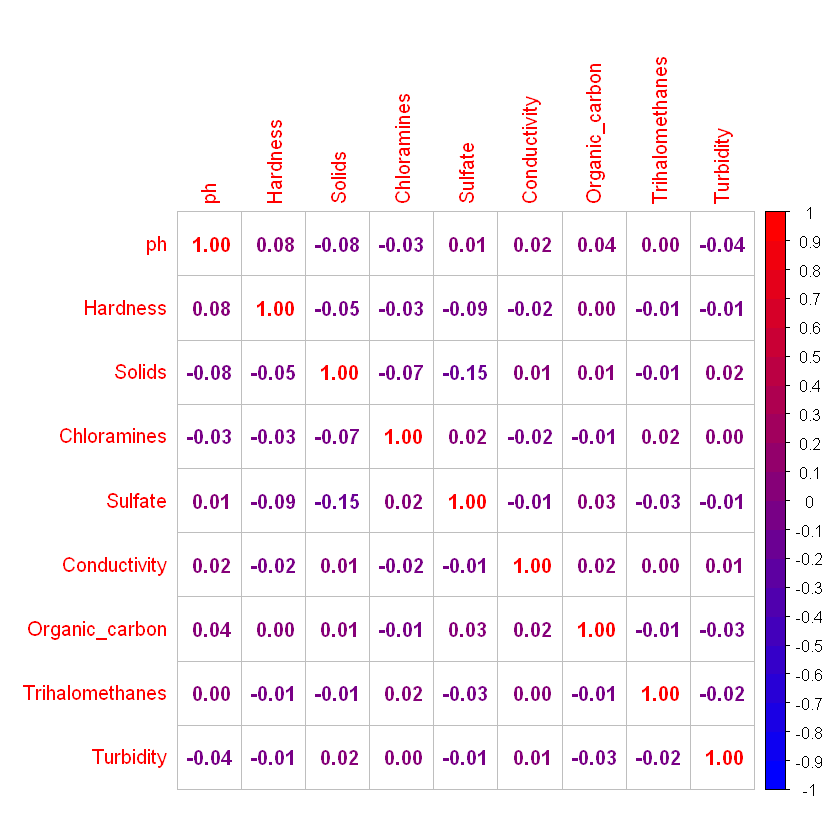

In [29]:
correlations <- cor(water.quality[, 1:9])
corrplot(correlations, method="number", col=colorRampPalette(c("blue","red"))(20))


All the features have very weak correlations with one another. Hence they are independent of one another.